Regresion Lineal

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
lineal = pd.read_csv("data.csv")

#leer datos
lineal.columns


Index(['metro', 'precio'], dtype='object')

In [10]:
lineal[['metro','precio']].head()

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


In [21]:
#parametros de recta

# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_lineal = np.array(lineal['metro']).reshape((-1, 1))
Y_lineal = np.array(lineal['precio'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_lineal, Y_lineal)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (a): {model.coef_}")

intercepto (b): 0.0
pendiente (a): [24.0627451]


In [19]:
a = 24
b = 0

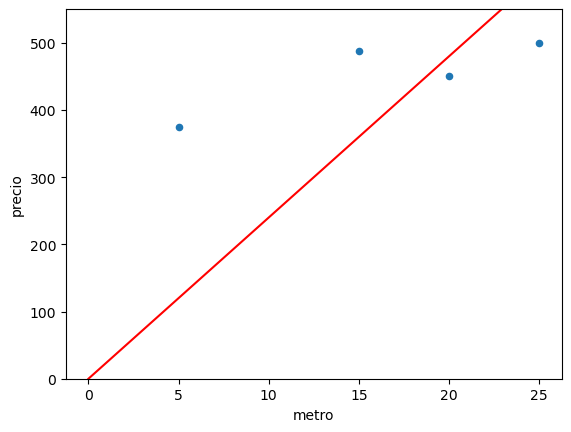

In [20]:
# puntos de la recta
x = np.linspace(0,lineal['metro'].max(),100)
y = a*x+b

# grafica de la recta
lineal.plot.scatter(x='metro', y='precio')
plt.plot(x, y, '-r')
plt.ylim(0,lineal['precio'].max()*1.1)
# plt.grid()
plt.show()

In [24]:
# calculo de las predicciones
lineal['pred'] = lineal['metro']*a+b

In [25]:
# calculo de la funcion de error
lineal['diff'] = lineal['pred']-lineal['precio']
lineal['cuad'] = lineal['diff']**2
lineal.head()

,metro,precio,pred,diff,cuad
0,5,375,120,-255,65025
1,15,487,360,-127,16129
2,20,450,480,30,900
3,25,500,600,100,10000


In [27]:
lineal['cuad'].mean()

23013.5

In [37]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['a'])
grid_error.head()

,a
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [40]:
def sum_error(w, lineal):
    b=0
    lineal['pred'] = lineal['metro']*a+b
    lineal['diff'] = lineal['pred']-lineal['precio']
    lineal['cuad'] = lineal['diff']**2
    return(lineal['cuad'].mean())

In [41]:
grid_error['error']=grid_error['a'].apply(lambda x: sum_error(x, lineal=lineal))
grid_error.head()

,a,error
0,50.000000,23013.5
1,53.061224,23013.5
2,56.122449,23013.5
3,59.183673,23013.5
4,62.244898,23013.5


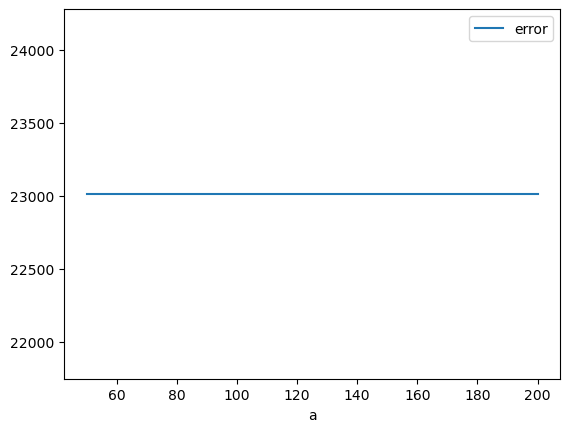

In [42]:
grid_error.plot(x='a',y='error')
plt.show()